In [1]:
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import random
from keras.models import Sequential
from PIL import Image
from keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [2]:
num_classes = 10
classes = {0:"airplane", 1:"automobile", 2:"bird",3:"cat", 4:"deer",\
           5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')/255
y_train_onehot = to_categorical(y_train, num_classes) 

x_test = x_test.astype('float32')/255
y_test_onehot = to_categorical(y_test, num_classes) 

print('x_train shape:', x_train.shape)
print('y_train shape', y_train.shape)
print('y_train_onehot shape:', y_train_onehot.shape)
print('x_test shape:', x_test.shape)
print('y_train shape', y_test.shape)
print('y_test_onehot shape:', y_test_onehot.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape (50000, 1)
y_train_onehot shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_train shape (10000, 1)
y_test_onehot shape: (10000, 10)


In [3]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.35),
    
    Conv2D(filters=64, kernel_size=(3,3), padding='SAME', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(), 
    Dropout(0.2),
    #input_shape=(32,32,3)
    Dense(10,activation='softmax'),
    Dense(units=10),
    Activation('softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3136)              0

In [5]:
model.fit(x_train, y_train, epochs=50)
model.evaluate(x_test,y_test)
y_pred = model.predict(x_test)

Epoch 1/50
  24/1563 [..............................] - ETA: 32s - loss: 2.3019 - accuracy: 0.0828

KeyboardInterrupt: 

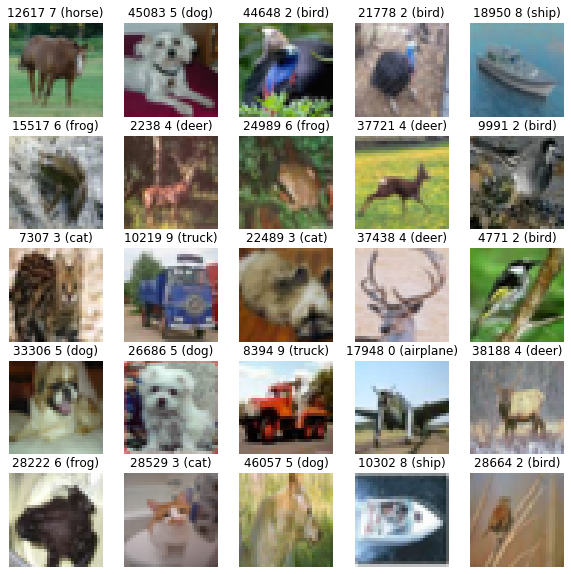

In [154]:
pltsize=2
row_images = 5
col_images = 5
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))

for i in range(row_images * col_images):
    i_rand = random.randint(0, x_train.shape[0])
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow(x_train[i_rand])
    plt.title(str(i_rand) + " " + str(y_train[i_rand][0])\
              + " (" + classes[y_train[i_rand][0]] + ")")